In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
import numpy as np
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer ## HAndle Missing Values
from sklearn.preprocessing import StandardScaler ## Feature Scaling
from sklearn.preprocessing import OneHotEncoder ## categorical to numerical
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor
import xgboost as xb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from imblearn.combine import SMOTETomek
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedGroupKFold
import sweetviz as sv 
pd.set_option('display.max_columns',None)
plt.rcParams['figure.figsize']=(15,10)
from sklearn.feature_selection import mutual_info_classif  ## good for only classification problem 
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectPercentile
from sklearn.preprocessing import OrdinalEncoder
from imblearn.over_sampling import RandomOverSampler

# EDA

In [2]:
df=pd.read_csv('final_loan.csv')

In [3]:
df.head()

,rate_of_interest,Interest_rate_spread,Upfront_charges,property_value,credit_type,LTV,dtir1,Status
0,NaN,NaN,NaN,118000.0,EXP,98.728814,45.0,1
1,NaN,NaN,NaN,NaN,EQUI,NaN,NaN,1
2,4.56,0.2000,595.0,508000.0,EXP,80.019685,46.0,0
3,4.25,0.6810,NaN,658000.0,EXP,69.376900,42.0,0
4,4.00,0.3042,0.0,758000.0,CRIF,91.886544,39.0,0


In [4]:
df.shape

(148670, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   rate_of_interest      112231 non-null  float64
 1   Interest_rate_spread  112031 non-null  float64
 2   Upfront_charges       109028 non-null  float64
 3   property_value        133572 non-null  float64
 4   credit_type           148670 non-null  object 
 5   LTV                   133572 non-null  float64
 6   dtir1                 124549 non-null  float64
 7   Status                148670 non-null  int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 9.1+ MB


In [6]:
feature_with_na=[feature for feature in df.columns if df[feature].isnull().sum()>1]

for feature in feature_with_na:
    print(feature,np.round(df[feature].isnull().sum().mean(),4), '%missing value')
    

rate_of_interest 36439.0 %missing value
Interest_rate_spread 36639.0 %missing value
Upfront_charges 39642.0 %missing value
property_value 15098.0 %missing value
LTV 15098.0 %missing value
dtir1 24121.0 %missing value


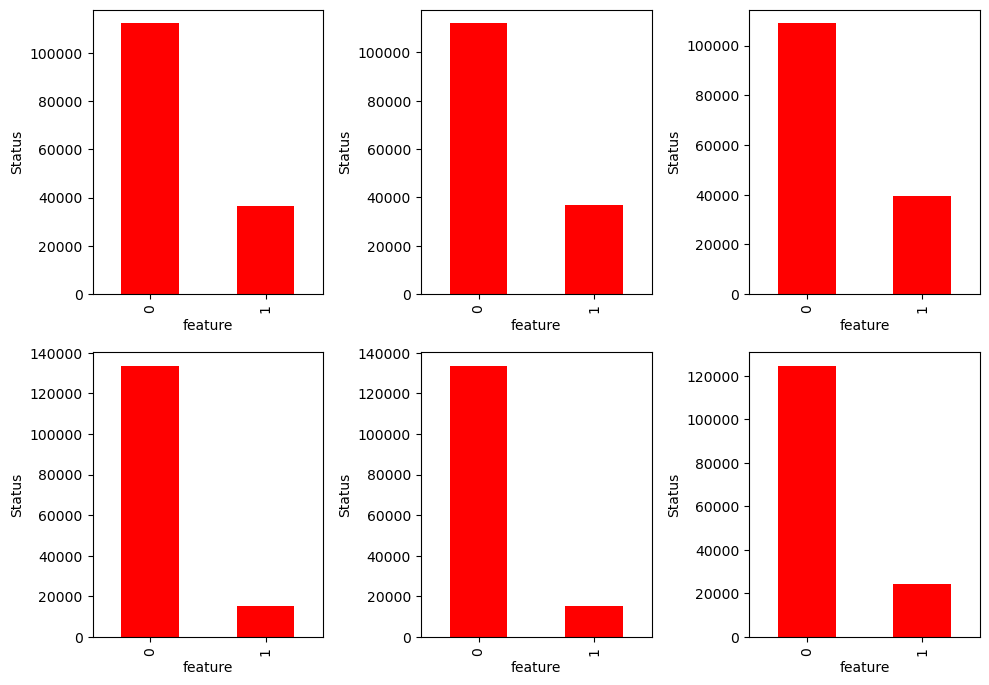

In [9]:
plt.figure(figsize=(10,10))
for i,feature in enumerate(feature_with_na,1):
    data=df.copy()
    data[feature]=np.where(data[feature].isnull(),1,0)
    plt.subplot(3,3,i)
    data.groupby(feature)['Status'].count().plot(kind='bar',color='r')
    plt.xlabel('feature')
    plt.ylabel('Status')
plt.tight_layout()
plt.show()

In [10]:
data=df.copy()

In [11]:
data.reset_index(drop=True,inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   rate_of_interest      112231 non-null  float64
 1   Interest_rate_spread  112031 non-null  float64
 2   Upfront_charges       109028 non-null  float64
 3   property_value        133572 non-null  float64
 4   credit_type           148670 non-null  object 
 5   LTV                   133572 non-null  float64
 6   dtir1                 124549 non-null  float64
 7   Status                148670 non-null  int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 9.1+ MB


In [13]:
numerical_feat=[feature for feature in data.columns if data[feature].dtype!='O']

In [14]:
numerical_feat.remove('Status')

In [15]:
numerical_feat

['rate_of_interest',
 'Interest_rate_spread',
 'Upfront_charges',
 'property_value',
 'LTV',
 'dtir1']

In [16]:
discrete_feature=[feature for feature in numerical_feat if len(data[feature].unique())<20]

In [17]:
discrete_feature

[]

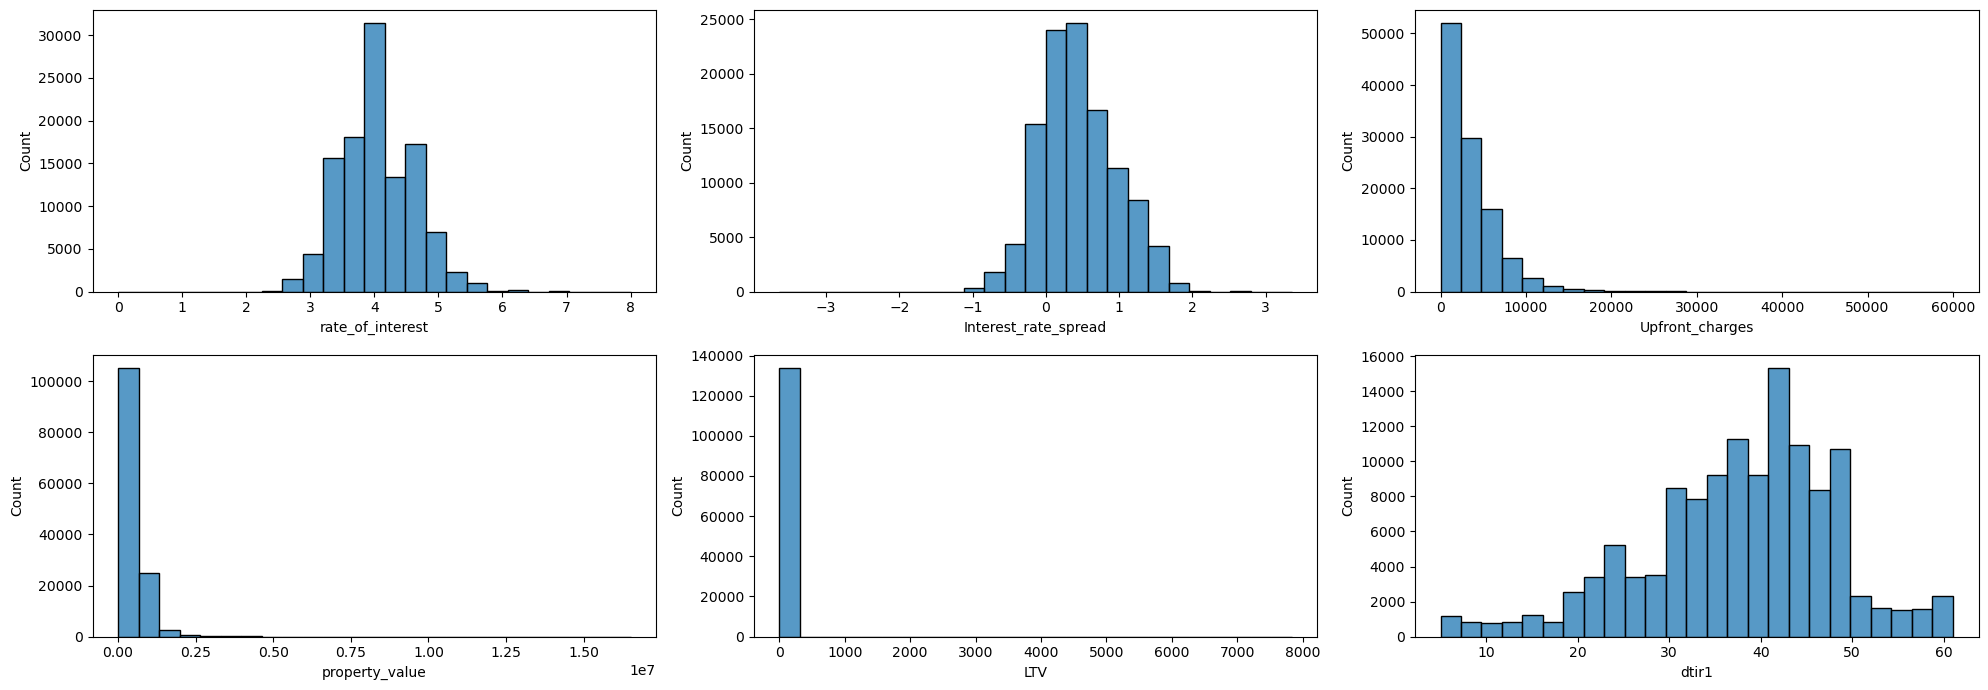

In [18]:
plt.figure(figsize=(20,7))
for i,feature in enumerate(numerical_feat,1):
    plt.subplot(2,3,i)
    sns.histplot(data=df,x=feature,bins=25)
    plt.xlabel(feature)
plt.tight_layout()
plt.show()

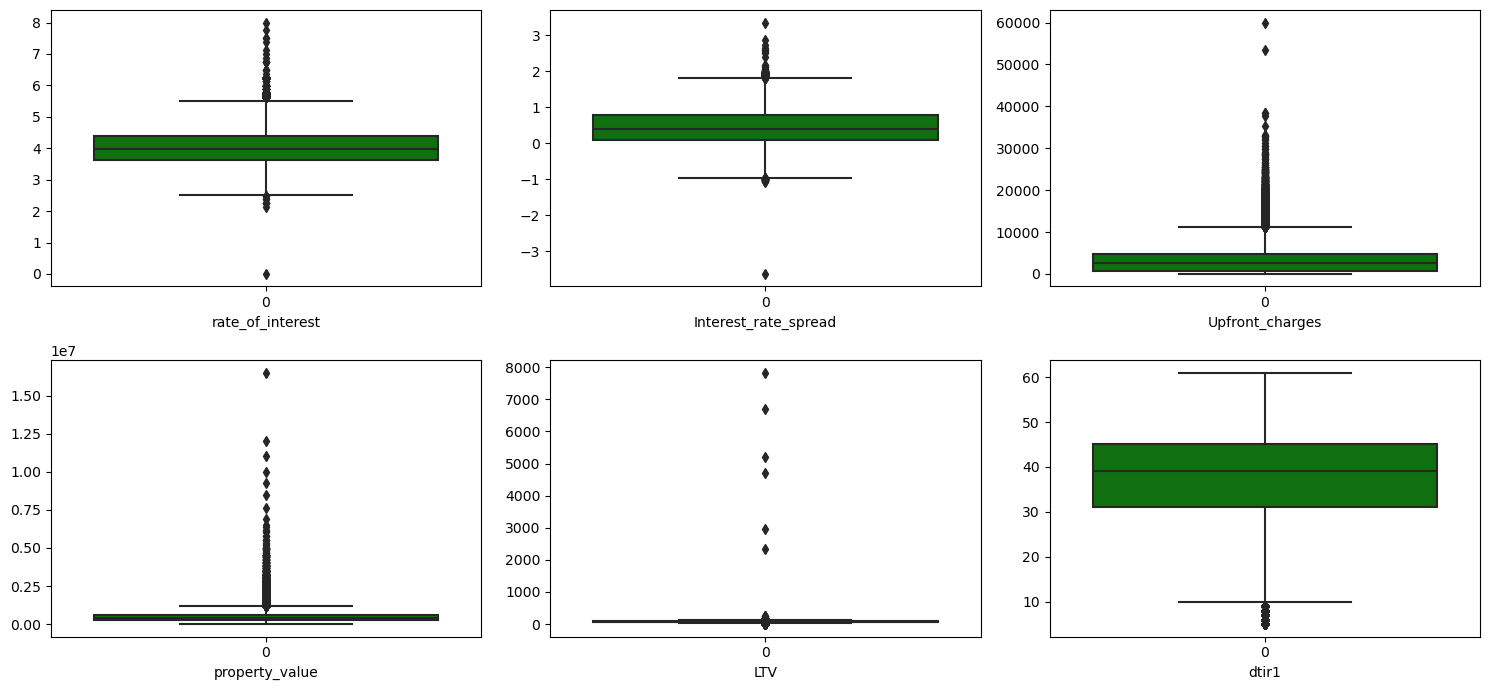

In [20]:
plt.figure(figsize=(15,7))
for i,feature in enumerate(numerical_feat,1):
    plt.subplot(2,3,i)
    sns.boxplot(df[feature],color='g')
    plt.xlabel(feature)
plt.tight_layout()
plt.show()

In [21]:
categorical_feat=[feature for feature in data.columns if data[feature].dtype=='O']

In [22]:
categorical_feat

['credit_type']

In [23]:
for feature in categorical_feat:
    print(f' feature is {feature} and number of unique feature are {len(data[feature].unique())}')

 feature is credit_type and number of unique feature are 4


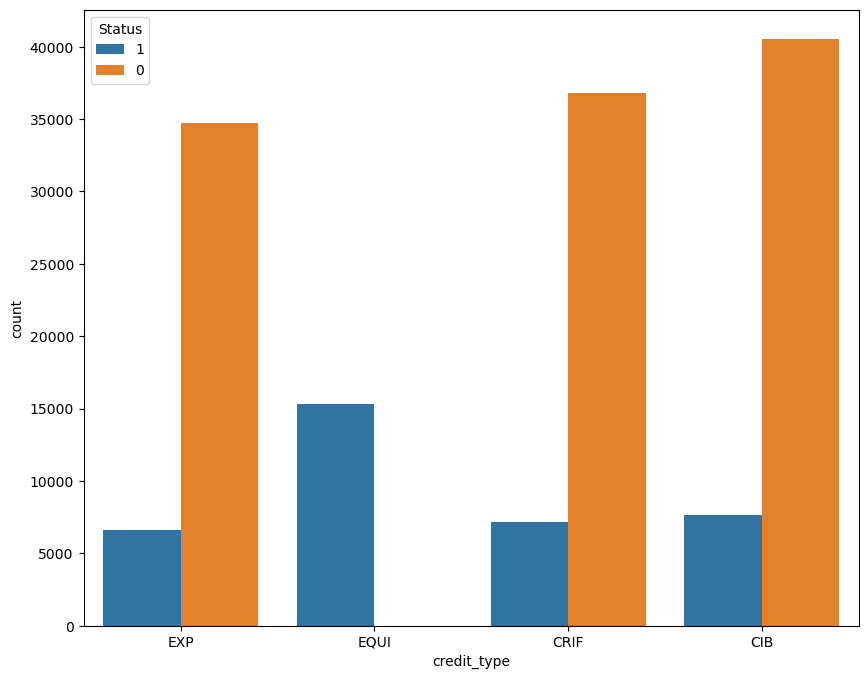

In [25]:
plt.figure(figsize=(10,8))
df2=data.copy()
df2['Status']=df2['Status'].astype('str')
sns.countplot(data=df2,x='credit_type',hue='Status')
plt.show()

Text(0.5, 1.0, 'Status')

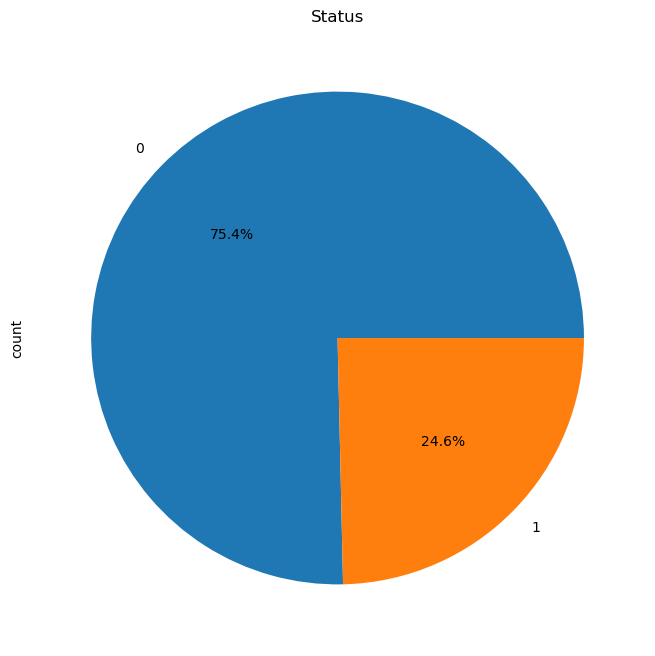

In [31]:
plt.figure(figsize=(8,8))
data['Status'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Status')